# GROUP N PLE RESULTS ANALYSIS
This data analysis on the Ple Results of 2010-2015 was done by Group N using Python and Analytics functions to interrogate the data and derive insights about the data

<table style="width:100%; font-size:20px;">
    <tr>
        <th style='text-align:left;'>NAME</th>
        <th style='text-align:left;'>REG NO</th>
        <th style='text-align:left;'>STUDENT NO</th>
    </tr>
    <tr>
        <td style='text-align:left;'>Rashidah Magezi Tumukunde</td>
        <td style='text-align:left;'>19/U/8741/EVE</td>
        <td style='text-align:left;'>1900708741</td>
    </tr>
    <tr>
        <td style='text-align:left;'>Kibalama Timothy</td>
        <td style='text-align:left;'>19/U/8373/EVE</td>
        <td style='text-align:left;'>1900708373</td>
    </tr>
    <tr>
        <td style='text-align:left;'>Mwesigwa Joshua</td>
        <td style='text-align:left;'>19/U/8883/EVE</td>
        <td style='text-align:left;'>1900708883</td>
    </tr>
    <tr>
        <td style='text-align:left;'>Ddamba Mahad</td>
        <td style='text-align:left;'>19/U/8192/EVE</td>
        <td style='text-align:left;'>1900708192</td>
    </tr>
    <tr>
        <td style='text-align:left;'>Asiimwe Maria</td>
        <td style='text-align:left;'>19/U/8980/EVE</td>
        <td style='text-align:left;'>1900708980</td>
    </tr>
</table>

## Initial Setup of the data for analysis

>1. Importing all necessary libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math 
from scipy import stats
plt.style.use('seaborn')

>2. Reading the file into variable ple

In [2]:
ple = pd.read_csv("PleResults2010-2015.csv",encoding="latin-1")
type(ple)

pandas.core.frame.DataFrame

##  Cleaning the data

>1. Check if there are duplicate rows and remove them

In [3]:
print('There are',ple.duplicated().sum(),'duplicate rows.')
ple_duplicates = ple[ple.duplicated()]
ple_duplicates.sort_values(by=['YEAR','DISTRICT ','SCHOOL']).head(7)

There are 139 duplicate rows.


,YEAR,DISTRICT,SCHOOL,TOTAL CANDIDATES,% DIV 1,% DIV 2,% DIV 3,% DIV 4,% U,% X,...,FEMALE % DIV4,FEMALE % U (%),FEMALE % X,MALE CANDIDATES,MALE % DIV1,MALE % DIV2,MALE % DIV3,MALE % DIV4,MALE % U,MALE % X
52072,2014,IBANDA,IBANDA TOWN PRIMARY SCHOOL,1,0.0,100.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
52074,2014,IBANDA,IBANDA TOWN PRIMARY SCHOOL,1,0.0,100.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,1.0,0.0,100.0,0.0,0.0,0.0,0.0
52075,2014,IBANDA,IBANDA TOWN PRIMARY SCHOOL,1,0.0,100.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,1.0,0.0,100.0,0.0,0.0,0.0,0.0
52076,2014,IBANDA,IBANDA TOWN PRIMARY SCHOOL,1,0.0,100.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
52077,2014,IBANDA,IBANDA TOWN PRIMARY SCHOOL,1,0.0,100.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
52078,2014,IBANDA,IBANDA TOWN PRIMARY SCHOOL,1,0.0,100.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
52079,2014,IBANDA,IBANDA TOWN PRIMARY SCHOOL,1,0.0,100.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,1.0,0.0,100.0,0.0,0.0,0.0,0.0


In [4]:
# removing the duplicate rows
ple.drop_duplicates(inplace = True)
print('There are now',ple.duplicated().sum(),'duplicate rows.')

There are now 0 duplicate rows.


>2. Checking for null cells, formatting some columns to numeric to prepare for calculations and filling null cells with a value.

In [5]:
# checking for number of cells with null values per column
ple.isnull().sum()

YEAR                   0
DISTRICT               0
SCHOOL                 0
TOTAL CANDIDATES       0
% DIV 1                0
% DIV 2                0
% DIV 3                0
% DIV 4                0
% U                    0
% X                    0
FEMALE CANDIDATES    155
FEMALE % DIV1        206
FEMALE % DIV2        206
FEMALE % DIV3        206
FEMALE % DIV4        206
FEMALE % U (%)       206
FEMALE % X           206
MALE CANDIDATES      185
MALE % DIV1          256
MALE % DIV2          256
MALE % DIV3          256
MALE % DIV4          256
MALE % U             256
MALE % X             256
dtype: int64

In [6]:
# converting the data to numeric form
def numeric(*columns):
    for column in columns:
        ple[column] = pd.to_numeric(ple[column], errors='coerce')

numeric('YEAR', 'TOTAL CANDIDATES', '% DIV 1', '% DIV 2', '% DIV 3', '% DIV 4', '% U', '% X', 'FEMALE CANDIDATES',
        'FEMALE % DIV1 ', 'FEMALE % DIV2', 'FEMALE % DIV3', 'FEMALE % DIV4', 'FEMALE % U (%)', 'FEMALE % X ',
        'MALE CANDIDATES', 'MALE % DIV1 ', 'MALE % DIV2', 'MALE % DIV3', 'MALE % DIV4 ', 'MALE % U ', 'MALE % X')

# replacing null values with zero since all columns with null values are numeric
ple.fillna(0, inplace = True)
# checking for number of cells with null values per column
ple.isnull().sum()

YEAR                 0
DISTRICT             0
SCHOOL               0
TOTAL CANDIDATES     0
% DIV 1              0
% DIV 2              0
% DIV 3              0
% DIV 4              0
% U                  0
% X                  0
FEMALE CANDIDATES    0
FEMALE % DIV1        0
FEMALE % DIV2        0
FEMALE % DIV3        0
FEMALE % DIV4        0
FEMALE % U (%)       0
FEMALE % X           0
MALE CANDIDATES      0
MALE % DIV1          0
MALE % DIV2          0
MALE % DIV3          0
MALE % DIV4          0
MALE % U             0
MALE % X             0
dtype: int64

## Checking for data consistency among related columns and correcting wrong values


>1. Adding columns for number of students per grade

In [7]:
# adding number of students, females and males per grade as new columns
def add_div_columns(data):
    # for all
    div = ['% DIV 1', '% DIV 2', '% DIV 3', '% DIV 4', '% U', '% X']
    for i in range(len(div)):
        data = data.assign(p=(ple[div[i]]*ple['TOTAL CANDIDATES']/100).round().astype(int))
        if i < 4:
            column_name = 'div'+str(i+1)
        elif i == 4:
            column_name = 'divU'
        else:
            column_name = 'divX'
        data = data.rename(columns={'p': column_name})
    # for female
    female_div = ['FEMALE % DIV1 ', 'FEMALE % DIV2', 'FEMALE % DIV3', 'FEMALE % DIV4', 'FEMALE % U (%)', 'FEMALE % X ']
    for i in range(len(female_div)):
        data = data.assign(p=(ple[female_div[i]]*ple['FEMALE CANDIDATES']/100).round().astype(int))
        if i < 4:
            column_name = 'female div'+str(i+1)
        elif i == 4:
            column_name = 'female divU'
        else:
            column_name = 'female divX'
        data = data.rename(columns={'p': column_name})
    # for male
    male_div = ['MALE % DIV1 ', 'MALE % DIV2', 'MALE % DIV3', 'MALE % DIV4 ', 'MALE % U ', 'MALE % X']
    for i in range(len(male_div)):
        data = data.assign(p=(ple[male_div[i]]*ple['MALE CANDIDATES']/100).round().astype(int))
        if i < 4:
            column_name = 'male div'+str(i+1)
        elif i == 4:
            column_name = 'male divU'
        else:
            column_name = 'male divX'
        data = data.rename(columns={'p': column_name})
    return data

ple = add_div_columns(ple)
ple.head(4)

,YEAR,DISTRICT,SCHOOL,TOTAL CANDIDATES,% DIV 1,% DIV 2,% DIV 3,% DIV 4,% U,% X,...,female div3,female div4,female divU,female divX,male div1,male div2,male div3,male div4,male divU,male divX
0,2010,KABAROLE,"EXCEL PRIMARY SCHOOL,RWIMI",23,100.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,13,0,0,0,0,0
1,2010,KALUNGU,"SACRED HEART P/S, KYAMUSANSALA",40,100.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2010,KAMPALA,KING FAHAD ISLAMIC PRI. SCHOOL,3,100.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,3,0,0,0,0,0
3,2010,KAMPALA,MAKINDYE JUNIOR SCHOOL,1,100.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0


>2. Comparing data in related columns to verify if it matches

In [8]:
def check_consistency():
    # getting total number of candidates
    total = ple['TOTAL CANDIDATES'].sum()

    # getting total number of males
    male_total = ple['MALE CANDIDATES'].sum()

    # getting total number of females
    female_total = ple['FEMALE CANDIDATES'].sum()

    # getting total number of candidates in each grade
    div_totals = ple[['div1','div2','div3','div4','divU','divX']].sum()

    # getting total number of males per div
    male_div_totals = ple[['male div1','male div2','male div3','male div4','male divU','male divX']].sum()

    # getting total number of females per div
    female_div_totals = ple[['female div1','female div2','female div3','female div4','female divU','female divX']].sum()
    
    if (total==(male_total+female_total) and total==div_totals.sum() and male_total==male_div_totals.sum() and female_total==female_div_totals.sum()):
        print('All related columns are now consistent.')
    else:
        print('Is total number of candidates equal to sum of males and females?',total==(male_total+female_total))
        print('Is total number of candidates equal to sum of candidates in grades?',total==div_totals.sum())
        print('Is total number of males equal to sum of males in grades?',male_total==male_div_totals.sum())
        print('Is total number of females equal to sum of females in grades?',female_total==female_div_totals.sum())


check_consistency()

Is total number of candidates equal to sum of males and females? False
Is total number of candidates equal to sum of candidates in grades? True
Is total number of males equal to sum of males in grades? False
Is total number of females equal to sum of females in grades? True


<b style='text-decoration:underline'>Observation 1: The male columns have wrong data since total males do not correlate with their grade yet female columns do.</b>

In [9]:
# Getting rows where total candidates is not equal to sum of males and females
wrong_total_rows = ple.loc[ple['TOTAL CANDIDATES'] != (ple['MALE CANDIDATES']+ple['FEMALE CANDIDATES'])]
print(wrong_total_rows[['TOTAL CANDIDATES','MALE CANDIDATES','FEMALE CANDIDATES']].head(3),'\n')
# So, we try to correct the male total and their grade and check again
for index in wrong_total_rows.index:
    ple.at[index,'MALE CANDIDATES'] = ple.at[index,'TOTAL CANDIDATES']-ple.at[index,'FEMALE CANDIDATES']
    ple.at[index,'male div1'] = (ple.at[index,'MALE % DIV1 ']*ple.at[index,'MALE CANDIDATES']/100).round().astype(int)
    ple.at[index,'male div2'] = (ple.at[index,'MALE % DIV2']*ple.at[index,'MALE CANDIDATES']/100).round().astype(int)
    ple.at[index,'male div3'] = (ple.at[index,'MALE % DIV3']*ple.at[index,'MALE CANDIDATES']/100).round().astype(int)
    ple.at[index,'male div4'] = (ple.at[index,'MALE % DIV4 ']*ple.at[index,'MALE CANDIDATES']/100).round().astype(int)
    ple.at[index,'male divU'] = (ple.at[index,'MALE % U ']*ple.at[index,'MALE CANDIDATES']/100).round().astype(int)
    ple.at[index,'male divX'] = (ple.at[index,'MALE % X']*ple.at[index,'MALE CANDIDATES']/100).round().astype(int)
    
#We check for consistency again
check_consistency()

       TOTAL CANDIDATES  MALE CANDIDATES  FEMALE CANDIDATES
11370                36             17.0               18.0
11680                92             42.0               49.0
11884               130             46.0               83.0 

Is total number of candidates equal to sum of males and females? True
Is total number of candidates equal to sum of candidates in grades? True
Is total number of males equal to sum of males in grades? False
Is total number of females equal to sum of females in grades? True


<b style='text-decoration:underline'>Observation 2: The male grade columns have wrong data since total males do not correlate with them</b>

In [39]:
# We try to recalculate the male grade columns then their percentages next

# Getting rows where total males is not equal to sum of males in all grades
wrong_male_rows = ple.loc[ple['MALE CANDIDATES'] != (ple['male div1']+ple['male div2']+ple['male div3']+ple['male div4']+ple['male divU']+ple['male divX'])]
# Correcting male grades and hence their percentanges
for index in wrong_male_rows.index:
    ple.at[index,'male div1'] = ple.at[index,'div1']-ple.at[index,'female div1']
    ple.at[index,'male div2'] = ple.at[index,'div2']-ple.at[index,'female div2']
    ple.at[index,'male div3'] = ple.at[index,'div3']-ple.at[index,'female div3']
    ple.at[index,'male div4'] = ple.at[index,'div4']-ple.at[index,'female div4']
    ple.at[index,'male divU'] = ple.at[index,'divU']-ple.at[index,'female divU']
    ple.at[index,'male divX'] = ple.at[index,'divX']-ple.at[index,'female divX']
    
    ple.at[index,'MALE % DIV1 '] = ((ple.at[index,'male div1']/ple.at[index,'MALE CANDIDATES'])*100).round(1)
    ple.at[index,'MALE % DIV2'] = ((ple.at[index,'male div2']/ple.at[index,'MALE CANDIDATES'])*100).round(1)
    ple.at[index,'MALE % DIV3'] = ((ple.at[index,'male div3']/ple.at[index,'MALE CANDIDATES'])*100).round(1)
    ple.at[index,'MALE % DIV4 '] = ((ple.at[index,'male div4']/ple.at[index,'MALE CANDIDATES'])*100).round(1)
    ple.at[index,'MALE % U '] = ((ple.at[index,'male divU']/ple.at[index,'MALE CANDIDATES'])*100).round(1)
    ple.at[index,'MALE % X'] = ((ple.at[index,'male divX']/ple.at[index,'MALE CANDIDATES'])*100).round(1)

#We check for consistency again
check_consistency()

All related columns are now consistent.


In [41]:
#checking for wrong percentage values
above100 = (ple[['% DIV 1','% DIV 2','% DIV 3','% DIV 4','% U','% X','FEMALE % DIV1 ','FEMALE % DIV2','FEMALE % DIV3','FEMALE % DIV4','FEMALE % U (%)','FEMALE % X ','MALE % DIV1 ','MALE % DIV2','MALE % DIV3','MALE % DIV4 ','MALE % U ','MALE % X']]>100).sum().sum()
below_zero = (ple[['% DIV 1','% DIV 2','% DIV 3','% DIV 4','% U','% X','FEMALE % DIV1 ','FEMALE % DIV2','FEMALE % DIV3','FEMALE % DIV4','FEMALE % U (%)','FEMALE % X ','MALE % DIV1 ','MALE % DIV2','MALE % DIV3','MALE % DIV4 ','MALE % U ','MALE % X']]<0).sum().sum()
print('There are',above100,' rows with percentages above 100.')
print('There are',below_zero,' rows with negative percentages.')

There are 0  rows with percentages above 100.
There are 0  rows with negative percentages.


In [12]:
# sorting data by year to easily deal with it
ple.sort_values(by=['YEAR','DISTRICT '], inplace=True)
# sorted data
ple.head(5)

,YEAR,DISTRICT,SCHOOL,TOTAL CANDIDATES,% DIV 1,% DIV 2,% DIV 3,% DIV 4,% U,% X,...,female div3,female div4,female divU,female divX,male div1,male div2,male div3,male div4,male divU,male divX
1184,2010,ABIM,MORULEM BOYS P.7 SCHOOL,56,16.1,83.9,0.0,0.0,0.0,0.0,...,0,0,0,0,9,38,0,0,0,0
1930,2010,ABIM,MORULEM GIRLS' P.7 SCHOOL,65,7.7,90.8,1.5,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
2142,2010,ABIM,KIRU P.7 SCHOOL,46,6.5,91.3,0.0,0.0,0.0,2.2,...,0,0,0,0,3,28,0,0,0,1
2622,2010,ABIM,LOYOROIT PRIMARY SCHOOL,22,4.5,36.4,18.2,27.3,4.5,9.1,...,0,3,1,1,1,7,4,3,0,1
3027,2010,ABIM,ORWAMUGE P.7 SCHOOL,55,3.6,76.4,10.9,1.8,1.8,5.5,...,5,0,1,1,2,27,1,1,0,2


### DEALING WITH DATA ACCORDING TO YEAR

In [13]:
class YearlyData:
    # constructor to instantiate a specific year
    def __init__(self, year):
        self.year = str(year)
        self.data = ple[ple["YEAR"] == year]
        self.grade_columns = ['% DIV 1', '% DIV 2', '% DIV 3', '% DIV 4', '% U', '% X']
        self.total = self.data['TOTAL CANDIDATES'].sum().astype(int)
        self.males = self.data['MALE CANDIDATES'].sum().astype(int)
        self.females = self.data['FEMALE CANDIDATES'].sum().astype(int)
        
        self.grade_totals = []
        self.grade_percentages = []
        self.male_grade_totals = []
        self.male_grade_percentages = []
        self.female_grade_totals = []
        self.female_grade_percentages = []
        self.sum_grades()
        
        self.dist = self.data[['DISTRICT ','TOTAL CANDIDATES','div1','div2','div3','div4','divU','divX']].groupby(['DISTRICT ']).sum()
        self.make_district_data()
        self.mean_per_dist = self.total/self.dist.shape[0]
        self.mean_per_school = self.total/self.data.shape[0]   
    
    # make sum of all grades in current year putting them in grade totals list
    def sum_grades(self):
        grade_columns = ['div1', 'div2', 'div3', 'div4', 'divU', 'divX']
        for column in grade_columns:
            self.grade_totals.append(self.data[column].sum())
            self.grade_percentages.append(((self.data[column].sum()/self.total)*100).round(1))
            
            self.male_grade_totals.append(self.data['male '+column].sum())
            self.male_grade_percentages.append(((self.data['male '+column].sum()/self.males)*100).round(1))
            
            self.female_grade_totals.append(self.data['female '+column].sum())
            self.female_grade_percentages.append(((self.data['female '+column].sum()/self.females)*100).round(1))
    
    # add columns to take number of candidates per grade
    def make_district_data(self):
        for i in ['div1','div2','div3','div4','divU','divX']:
            self.dist = self.dist.assign(p=((self.dist[i]/self.dist['TOTAL CANDIDATES'])*100).round(0)).rename(columns={'p': '%'+i})
    
    # get sum of particular grade in current year
    def get_grade_sum(self, div):
        return self.grade_totals[div-1]

    # get male grade sum by passing in the grade e.g 1
    def get_male_grade_sum(self, div):
        return self.male_grade_totals[div-1]

    # get female grade sum by passing in the grade e.g 1
    def get_female_grade_sum(self, div):
        return self.female_grade_totals[div-1]
    
    
    # ------------------------------ objective 1-5 ---------------------------------------------
    # generate minimal report
    def minimal_report(self):
        print('MINIMAL REPORT FOR',self.year)
        print('Total:',self.total)
        print('Total males:',self.males)
        print('Total females:',self.females)
        print('Total schools:', self.data.shape[0])
        print('Total districts:', self.dist.shape[0])
        print('\nAverage students per district:',self.mean_per_dist)
        print('Average students per school',self.mean_per_school)
        grade_names = ['div1','div2','div3','div4','divU','divX']
        for i in range(6):
            print(grade_names[i],':',self.grade_totals[i])
        
        print('\nGRADES BY GENDER')
        print('      Males  Females')
        for i in range(6):
            print(grade_names[i]+':',self.get_male_grade_sum(i+1),' ',self.get_female_grade_sum(i+1))
    # ------------------------------ end of objective 1-5 --------------------------------------

    # ------------------------------ objective 6 ---------------------------------------------
    # return top schools in current year
    def top(self, num=10):
        return self.data.sort_values(by=self.grade_columns, ascending=False).head(num)
    
    # print top schools in a year
    def print_top(self, num=10):
        print('THE TOP',num,'SCHOOLS IN',self.year,'WERE:\n')
        return self.top(num)
    # ------------------------------ end of objective 6 --------------------------------------

    # ------------------------------ objective 7 ---------------------------------------------
    # print last schools in current year
    def print_last(self, num=10):
        print('THE LAST',num,'SCHOOLS IN',self.year,'STARTING WITH THE WORST WERE:\n')
        return self.data.sort_values(by=self.grade_columns).head(num)
    # ------------------------------ end of objective 7 --------------------------------------
    
    # ------------------------------ objective 8 ---------------------------------------------
    # return top performing districts
    def top_districts(self,num=10):
        return self.dist.sort_values(by=['%div1','%div2','%div3','%div4','%divU','%divX'], ascending=False).head(num)

    # print top performing districts
    def print_top_districts(self,num=10):
        print('THE TOP',num,'DISTRICTS IN',self.year,'WERE:\n')
        return self.top_districts(num)
    # ------------------------------ end of objective 8 --------------------------------------    
    
    # ------------------------------ objective 9 ---------------------------------------------
    # return worst performing districts
    def last_districts(self,num=10):
        return self.dist.sort_values(by=['%div1','%div2','%div3','%div4','%divU','%divX']).head(num)
    
    # print worst performing districts
    def print_last_districts(self,num=10):
        print('THE WORST',num,'PERFORMING DISTRICTS IN',self.year,'STARTING WITH THE WORST WERE:\n')
        return self.dist.sort_values(by=['%div1','%div2','%div3','%div4','%divU','%divX']).head(num)
    # ------------------------------ end of objective 9 --------------------------------------
    
    # ------------------------------ objective 10 ---------------------------------------------
    # generate performance chart for gender
    def draw_gender_grade_chart(self):
        pd.DataFrame({'female': self.female_grade_percentages, 'male': self.male_grade_percentages}, index=['div1','div2','div3','div4','divU','divX']).plot.bar(rot=0).set(xlabel='GRADE', ylabel='NUMBER OF STUDENTS', title='A BAR GRAPH SHOWING GRADE PER GENDER IN '+self.year)
    # ------------------------------ end of objective 10 --------------------------------------
    
    # ------------------------------ objective 11 ---------------------------------------------
    # generate chart for grades in current year
    def draw_grade_chart(self):
        data = [i for i in self.grade_totals]
        explodes = [0.2,0,0,0,0,0]
        labels = ['div1','div2','div3','div4','divU','divX']
        plt.pie(data, labels=labels, explode=explodes, autopct='%1.1f%%')
        plt.title('A PIE CHART SHOWING GRADES IN '+self.year)
        plt.show()
    # ------------------------------ end of objective 11 --------------------------------------
        
    # ------------------------------ objective 12 ---------------------------------------------
    # get grade with most candidates
    def max_grade(self):
        print('Grade with most candidates in',self.year)
        return ['div1','div2','div3','div4','divU','divX'][self.grade_totals.index(max(self.grade_totals))]+': '+str(max(self.grade_totals))
    # ------------------------------ end of objective 12 --------------------------------------
    
    # ------------------------------ objective 13 ---------------------------------------------
    # get grade with fewest candidates
    def min_grade(self):
        print('Grade with fewest candidates in',self.year)
        return ['div1','div2','div3','div4','divU','divX'][self.grade_totals.index(min(self.grade_totals))]+': '+str(min(self.grade_totals))
    # ------------------------------ end of objective 13 --------------------------------------
    
    # ------------------------------ objective 14 ---------------------------------------------
    # get grade with most males
    def max_male_grade(self):
        print('Grade with most males in',self.year)
        return ['div1','div2','div3','div4','divU','divX'][self.male_grade_totals.index(max(self.male_grade_totals))]+': '+str(max(self.male_grade_totals))
    # ------------------------------ end of objective 14 --------------------------------------
    
    # ------------------------------ objective 15 ---------------------------------------------
    # get grade with fewest males
    def min_male_grade(self):
        print('Grade with fewest males in',self.year)
        return ['div1','div2','div3','div4','divU','divX'][self.male_grade_totals.index(min(self.male_grade_totals))]+': '+str(min(self.male_grade_totals))
    # ------------------------------ end of objective 15 --------------------------------------
    
    # ------------------------------ objective 16 ---------------------------------------------
    # get grade with most females
    def max_female_grade(self):
        print('Grade with most females in',self.year)
        return ['div1','div2','div3','div4','divU','divX'][self.female_grade_totals.index(max(self.female_grade_totals))]+': '+str(max(self.female_grade_totals))
    # ------------------------------ end of objective 16 --------------------------------------
    
    # ------------------------------ objective 17 ---------------------------------------------
    # get grade with fewest females
    def min_female_grade(self):
        print('Grade with fewest females in',self.year)
        return ['div1','div2','div3','div4','divU','divX'][self.female_grade_totals.index(min(self.female_grade_totals))]+': '+str(min(self.female_grade_totals))
    # ------------------------------ end of objective 17 --------------------------------------
    
    # ------------------------------ objective 18 ---------------------------------------------
    # relate students who got div 1 with total
    def div1_scatter(self):
        self.data[['TOTAL CANDIDATES','div1']].plot(kind='scatter', x='TOTAL CANDIDATES',y='div1').set(title='A SCATTER GRAPH SHOWING NUMBER OF CANDIDATES WHO GOT DIV1 FROM THE TOTAL.')
    # ------------------------------ end of objective 18 --------------------------------------

In [14]:
#creating objects for each year's data
ple2010 = YearlyData(2010)
ple2011 = YearlyData(2011)
ple2012 = YearlyData(2012)
ple2013 = YearlyData(2013)
ple2014 = YearlyData(2014)
ple2015 = YearlyData(2015)

In [15]:
#printing the minimal report for a given year
ple2010.minimal_report()

MINIMAL REPORT FOR 2010
Total: 511294
Total males: 259000
Total females: 252294
Total schools: 10837
Total districts: 133

Average students per district: 3844.315789473684
Average students per school 47.180400479837594
div1 : 42406
div2 : 221113
div3 : 109944
div4 : 59034
divU : 58789
divX : 20008

GRADES BY GENDER
      Males  Females
div1: 25501   16905
div2: 119375   101738
div3: 49719   60225
div4: 29832   29202
divU: 25549   33240
divX: 9024   10984


In [16]:
#printing the top schools for a given year
ple2010.print_top(5)

THE TOP 5 SCHOOLS IN 2010 WERE:



,YEAR,DISTRICT,SCHOOL,TOTAL CANDIDATES,% DIV 1,% DIV 2,% DIV 3,% DIV 4,% U,% X,...,female div3,female div4,female divU,female divX,male div1,male div2,male div3,male div4,male divU,male divX
0,2010,KABAROLE,"EXCEL PRIMARY SCHOOL,RWIMI",23,100.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,13,0,0,0,0,0
1,2010,KALUNGU,"SACRED HEART P/S, KYAMUSANSALA",40,100.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2010,KAMPALA,KING FAHAD ISLAMIC PRI. SCHOOL,3,100.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,3,0,0,0,0,0
3,2010,KAMPALA,MAKINDYE JUNIOR SCHOOL,1,100.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
4,2010,KAMPALA,WATERFORD P/S NAJJANANKUMBI,19,100.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,12,0,0,0,0,0


In [17]:
#printing the last schools for a given year
ple2010.print_last(5)

THE LAST 5 SCHOOLS IN 2010 STARTING WITH THE WORST WERE:



,YEAR,DISTRICT,SCHOOL,TOTAL CANDIDATES,% DIV 1,% DIV 2,% DIV 3,% DIV 4,% U,% X,...,female div3,female div4,female divU,female divX,male div1,male div2,male div3,male div4,male divU,male divX
9650,2010,NTUNGAMO,KIBURARA PRIMARY SCHOOL,1,0.0,0.0,0.0,0.0,0.0,100.0,...,0,0,0,1,0,0,0,0,0,0
10052,2010,RAKAI,KIZIRA PRIMARY SCHOOL,15,0.0,0.0,0.0,0.0,53.3,46.7,...,0,0,5,4,0,0,0,0,3,3
5190,2010,BUGIRI,KIMIRA PRIMARY SCHOOL,15,0.0,0.0,0.0,0.0,100.0,0.0,...,0,0,4,0,0,0,0,0,11,0
5351,2010,BUKOMANSIMBI,KABIGI ISLAMIC VIRTUE P/S,16,0.0,0.0,0.0,6.3,37.5,56.3,...,0,0,0,7,0,0,0,1,6,2
10008,2010,RAKAI,KAKUNYU P.7 SCHOOL,15,0.0,0.0,0.0,6.7,66.7,26.7,...,0,0,7,3,0,0,0,1,3,1


In [18]:
#printing the top  districts
ple2010.print_top_districts(5)

THE TOP 5 DISTRICTS IN 2010 WERE:



,TOTAL CANDIDATES,div1,div2,div3,div4,divU,divX,%div1,%div2,%div3,%div4,%divU,%divX
DISTRICT,,,,,,,,,,,,,
MASAKA M/C,1894,902,761,123,34,38,36,48.0,40.0,6.0,2.0,2.0,2.0
MBARARA M/C,2375,985,1264,75,19,9,23,41.0,53.0,3.0,1.0,0.0,1.0
KABALE M/C,1474,604,708,98,23,7,34,41.0,48.0,7.0,2.0,0.0,2.0
FORTPORTAL M/C,1334,529,760,20,3,2,20,40.0,57.0,1.0,0.0,0.0,1.0
BUSHENYI M/C,1301,489,607,109,32,45,19,38.0,47.0,8.0,2.0,3.0,1.0


In [19]:
#printing the worst districts
ple2010.print_last_districts(5)

THE WORST 5 PERFORMING DISTRICTS IN 2010 STARTING WITH THE WORST WERE:



,TOTAL CANDIDATES,div1,div2,div3,div4,divU,divX,%div1,%div2,%div3,%div4,%divU,%divX
DISTRICT,,,,,,,,,,,,,
KWEEN,2650,13,614,693,517,769,44,0.0,23.0,26.0,20.0,29.0,2.0
LUUKA,5488,37,1182,1442,907,1558,362,1.0,22.0,26.0,17.0,28.0,7.0
NWOYA,1283,11,324,302,296,276,74,1.0,25.0,24.0,23.0,22.0,6.0
BUYENDE,3697,35,920,1052,620,850,220,1.0,25.0,28.0,17.0,23.0,6.0
BUKWO,1884,14,531,478,338,455,68,1.0,28.0,25.0,18.0,24.0,4.0


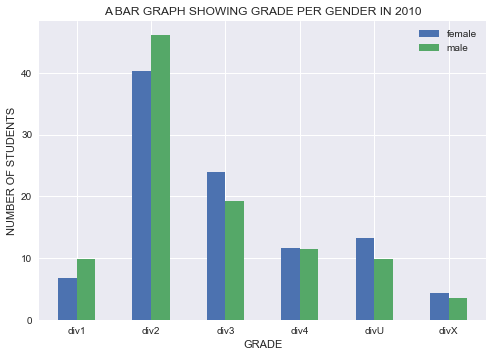

In [20]:
# plotting chart for performance per gender in particular year
ple2010.draw_gender_grade_chart()

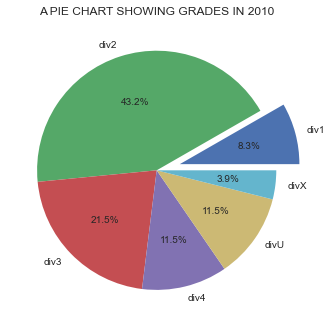

In [21]:
# showing percentage of grades in a particular year
ple2010.draw_grade_chart()

In [22]:
# print grade with most candidates in a particular year
ple2010.max_grade()

Grade with most candidates in 2010


'div2: 221113'

In [23]:
# print grade with least candidates in a particular year
ple2010.min_grade()

Grade with fewest candidates in 2010


'divX: 20008'

In [24]:
# print grade with most males in a particular year
ple2010.max_male_grade()

Grade with most males in 2010


'div2: 119375'

In [25]:
# print grade with fewest males in a particular year
ple2010.min_male_grade()

Grade with fewest males in 2010


'divX: 9024'

In [26]:
# print grade with most females in a particular year
ple2010.max_female_grade()

Grade with most females in 2010


'div2: 101738'

In [27]:
# print grade with least females in a particular year
ple2010.min_female_grade()

Grade with fewest females in 2010


'divX: 10984'

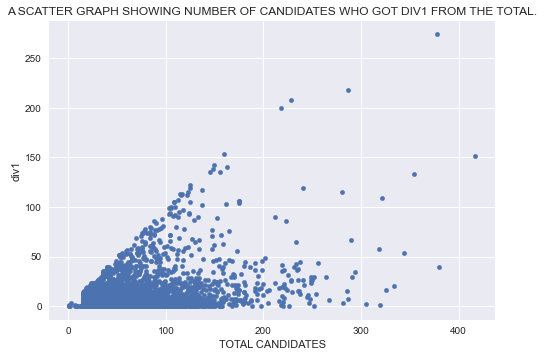

In [28]:
# relate students who got division 1 with the total
ple2010.div1_scatter()

### DEALING WITH DATA IN ALL YEARS

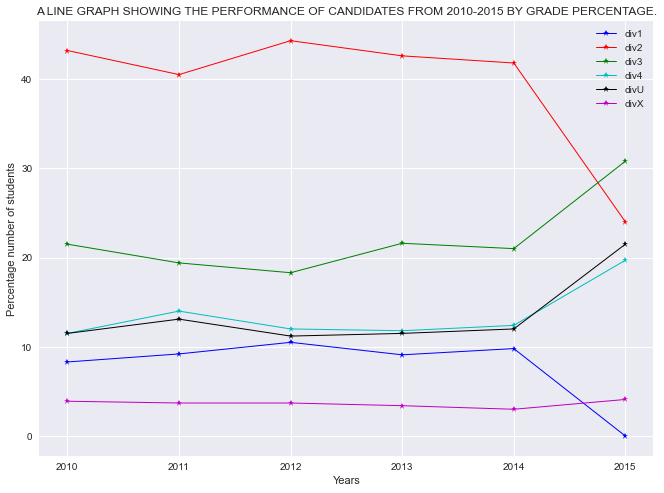

In [29]:
#creating a dataframe of empty grade columns
data = pd.DataFrame({'div1':[],'div2':[],'div3':[],'div4':[],'divU':[],'divX':[]})

#adding rows to the above data set by adding details
data.loc[0] = (ple2010.grade_percentages)
data.loc[1] = (ple2011.grade_percentages)
data.loc[2] = (ple2012.grade_percentages)
data.loc[3] = (ple2013.grade_percentages)
data.loc[4] = (ple2014.grade_percentages)
data.loc[5] = (ple2015.grade_percentages)

#setting the figure size
plt.rcParams['figure.figsize'] = (11,8)

data.index = ['2010','2011','2012','2013','2014','2015']
data.plot(linewidth=1, marker='*', color=['b', 'r', 'g', 'c', 'k', 'm'],
          title="A LINE GRAPH SHOWING THE PERFORMANCE OF CANDIDATES FROM 2010-2015 BY GRADE PERCENTAGE.")
plt.xlabel('Years')
plt.ylabel('Percentage number of students')
plt.show()

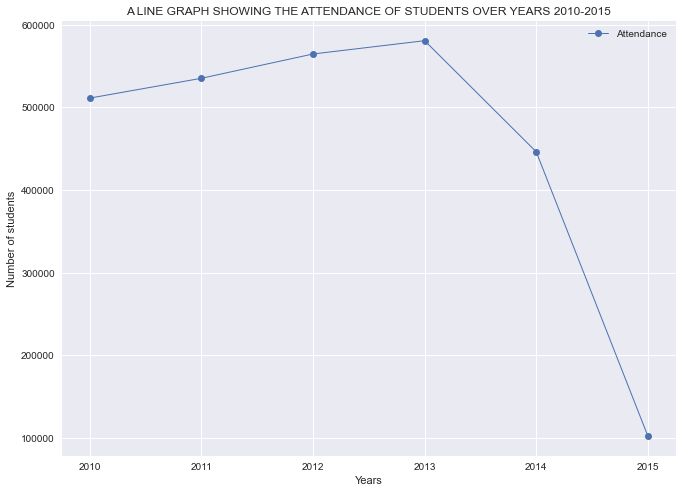

In [30]:
#showing number of candidates who sat in the years 2010 to 2015

#creating a dataframe of candidate totals per year
plt.plot(pd.DataFrame([ple2010.total,ple2011.total,ple2012.total,ple2013.total,ple2014.total,ple2015.total], index=['2010','2011','2012','2013','2014','2015']),linewidth=1, marker='o')
plt.xlabel('Years')
plt.legend(['Attendance'])
plt.ylabel('Number of students')
plt.title("A LINE GRAPH SHOWING THE ATTENDANCE OF STUDENTS OVER YEARS 2010-2015")
plt.show()

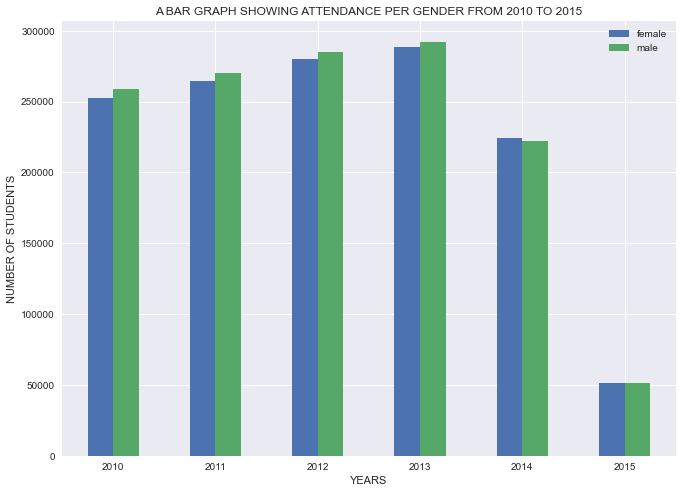

In [31]:
# plot bar graph showing attendance per gender in all years
gender_attendance = pd.DataFrame({'female': [ple2010.females,ple2011.females,ple2012.females,ple2013.females,ple2014.females,ple2015.females], 'male': [ple2010.males,ple2011.males,ple2012.males,ple2013.males,ple2014.males,ple2015.males]}, index=['2010','2011','2012','2013','2014','2015'])
ax = gender_attendance.plot.bar(rot=0)
gp = ax.set(xlabel='YEARS', ylabel='NUMBER OF STUDENTS', title='A BAR GRAPH SHOWING ATTENDANCE PER GENDER FROM 2010 TO 2015')

In [32]:
# getting schools that appeared among top 20 in all the years

# we get top 20 schools in each year adding a column, num with value=1 in each row 
top_20 = [obj.top(20)[['DISTRICT ','SCHOOL']].assign(num=1) for obj in [ple2010,ple2011,ple2012,ple2013,ple2014,ple2015]]

# data how it looks before adding
print('\nTHE DATA FOR 2010 ONLY.')
print(top_20[0].head(5))
print('\nTHE DATA FOR 2011 ONLY.')
print(top_20[1].head(5))

length = len(top_20)
# adding all schools in each of the years together to the data of 2010
for i in range(1,length):
    top_20[0] = top_20[0].append([top_20[i]])

print('\nTHE DATA FOR 2010 AND OTHER YEARS ADDED TOGETHER.')
print(top_20[0])

appeared = top_20[0].groupby(['SCHOOL']).sum().sort_values(by=['num'], ascending=False)
print('\nTABLE SHOWING SCHOOLS THAT APPEARED ATLEAST 3 TIMES AMONG TOP 20 IN ALL YEARS')
appeared[appeared['num']>=3]


THE DATA FOR 2010 ONLY.
  DISTRICT                           SCHOOL  num
0  KABAROLE      EXCEL PRIMARY SCHOOL,RWIMI    1
1   KALUNGU  SACRED HEART P/S, KYAMUSANSALA    1
2   KAMPALA  KING FAHAD ISLAMIC PRI. SCHOOL    1
3   KAMPALA          MAKINDYE JUNIOR SCHOOL    1
4   KAMPALA     WATERFORD P/S NAJJANANKUMBI    1

THE DATA FOR 2011 ONLY.
          DISTRICT                          SCHOOL  num
10837  BUSHENYI M/C            PEARL JUNIOR SCHOOL    1
10838         GOMBA    ST.JOAN OF ARC BOARDING P/S    1
10839      KABAROLE     EXCEL PRIMARY SCHOOL,RWIMI    1
10840      KABAROLE    ST.JUDE KYEGOBE PRI. SCHOOL    1
10841       KALUNGU  ST.MARYS IMMACULATE VILLA P/S    1

THE DATA FOR 2010 AND OTHER YEARS ADDED TOGETHER.
      DISTRICT                           SCHOOL  num
0      KABAROLE      EXCEL PRIMARY SCHOOL,RWIMI    1
1       KALUNGU  SACRED HEART P/S, KYAMUSANSALA    1
2       KAMPALA  KING FAHAD ISLAMIC PRI. SCHOOL    1
3       KAMPALA          MAKINDYE JUNIOR SCHOOL    1
4   

,num
SCHOOL,
VICTORY LEARNING PRI. SCHOOL,4
K.Y DAY AND BOARDING P/S,3
VILLA ROAD PRIMARY SCHOOL,3
KABOJJA JUNIOR PRIMARY SCHOOL,3
ST.MARYS IMMACULATE VILLA P/S,3
PARENTAL CARE SCHOOL,3
"EXCEL PRIMARY SCHOOL,RWIMI",3


In [33]:
# show districts that appeared among top 20 in all years

top_20_dist = [obj.top_districts(20).assign(num=1) for obj in [ple2010,ple2011,ple2012,ple2013,ple2014,ple2015]]

length = len(top_20_dist)
for i in range(1,length):
    top_20_dist[0] = top_20_dist[0].append([top_20_dist[i]])

appeared = top_20_dist[0].groupby(['DISTRICT ']).sum().sort_values(by=['num'], ascending=False)
print('TABLE SHOWING DISTRICTS THAT APPEARED ATLEAST 5 TIMES AMONG TOP 20 IN ALL YEARS')
atleast5 = appeared[appeared['num']>=5]
atleast5[['TOTAL CANDIDATES','num']]

TABLE SHOWING DISTRICTS THAT APPEARED ATLEAST 5 TIMES AMONG TOP 20 IN ALL YEARS


,TOTAL CANDIDATES,num
DISTRICT,,
MASINDI M/C,7432,5
SHEEMA,21710,5
MUKONO M/C,17335,5
MBALE M/C,10606,5
MASAKA M/C,8404,5
KAMPALA,133263,5


In [34]:
# showing districts that appeared among last 20 in all years
last_20_dist = [obj.last_districts(20).assign(num=1) for obj in [ple2010,ple2011,ple2012,ple2013,ple2014,ple2015]]

length = len(last_20_dist)
for i in range(1,length):
    last_20_dist[0] = last_20_dist[0].append([last_20_dist[i]])

appeared = last_20_dist[0].groupby(['DISTRICT ']).sum().sort_values(by=['num'], ascending=False)
print('TABLE SHOWING DISTRICTS THAT APPEARED ATLEAST 5 TIMES AMONG LAST 20 IN ALL YEARS')
atleast5 = appeared[appeared['num']>=5]
atleast5[['TOTAL CANDIDATES','num']]

TABLE SHOWING DISTRICTS THAT APPEARED ATLEAST 5 TIMES AMONG LAST 20 IN ALL YEARS


,TOTAL CANDIDATES,num
DISTRICT,,
ALEBTONG,15674,5
BULAMBULI,14248,5
YUMBE,10348,5
LUUKA,32315,5
MANAFWA,24829,5
DOKOLO,15266,5
NWOYA,6486,5
KWEEN,13514,5


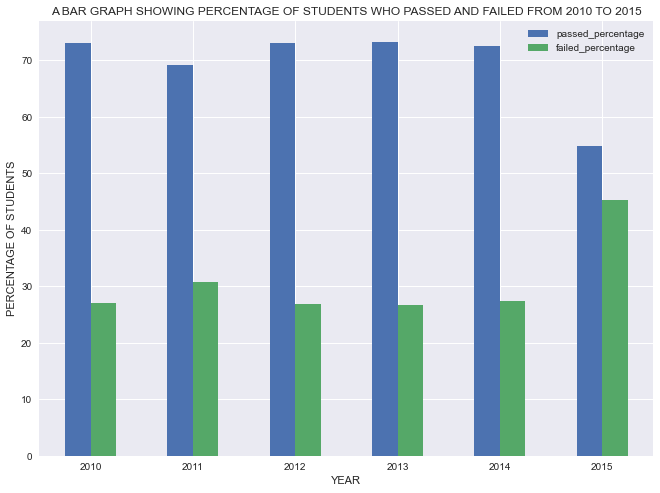

In [35]:
# showing percentage of students who passed and failed assuming pass is <div4 and fail >=div4
data = ple.assign(passed=ple['div1']+ple['div2']+ple['div3']).assign(failed=ple['div4']+ple['divU']+ple['divX'])
data = data[['YEAR','TOTAL CANDIDATES','passed','failed']].groupby(['YEAR']).sum()
data = data.assign(passed_percentage=((data['passed']/data['TOTAL CANDIDATES'])*100).round(1)).assign(failed_percentage=((data['failed']/data['TOTAL CANDIDATES'])*100).round(1))
data_plot = data[['passed_percentage','failed_percentage']].plot.bar(rot=0)
ax = data_plot.set(xlabel='YEAR', ylabel='PERCENTAGE OF STUDENTS', title='A BAR GRAPH SHOWING PERCENTAGE OF STUDENTS WHO PASSED AND FAILED FROM 2010 TO 2015')

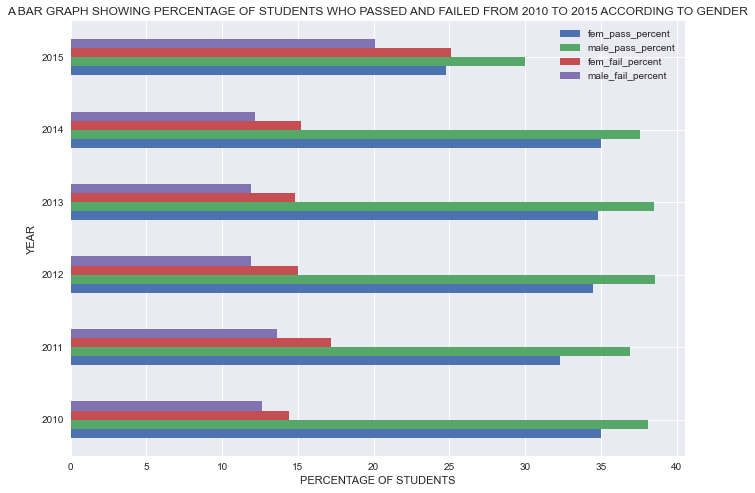

In [36]:
# showing percentage of students per gender who passed and failed assuming pass is <div4 and fail >=div4
data = ple.assign(fem_passed=ple['female div1']+ple['female div2']+ple['female div3']).assign(fem_failed=ple['female div4']+ple['female divU']+ple['female divX'])
data = data.assign(male_passed=data['male div1']+data['male div2']+data['male div3']).assign(male_failed=data['male div4']+data['male divU']+data['male divX'])
data = data[['YEAR','TOTAL CANDIDATES','fem_passed','fem_failed','male_passed','male_failed']].groupby(['YEAR']).sum()
data = data.assign(fem_pass_percent=((data['fem_passed']/data['TOTAL CANDIDATES'])*100).round(1)).assign(fem_fail_percent=((data['fem_failed']/data['TOTAL CANDIDATES'])*100).round(1))
data = data.assign(male_pass_percent=((data['male_passed']/data['TOTAL CANDIDATES'])*100).round(1)).assign(male_fail_percent=((data['male_failed']/data['TOTAL CANDIDATES'])*100).round(1))
data_plot = data[['fem_pass_percent','male_pass_percent','fem_fail_percent','male_fail_percent']].plot.barh(rot=0)
ax = data_plot.set(ylabel='YEAR', xlabel='PERCENTAGE OF STUDENTS', title='A BAR GRAPH SHOWING PERCENTAGE OF STUDENTS WHO PASSED AND FAILED FROM 2010 TO 2015 ACCORDING TO GENDER')

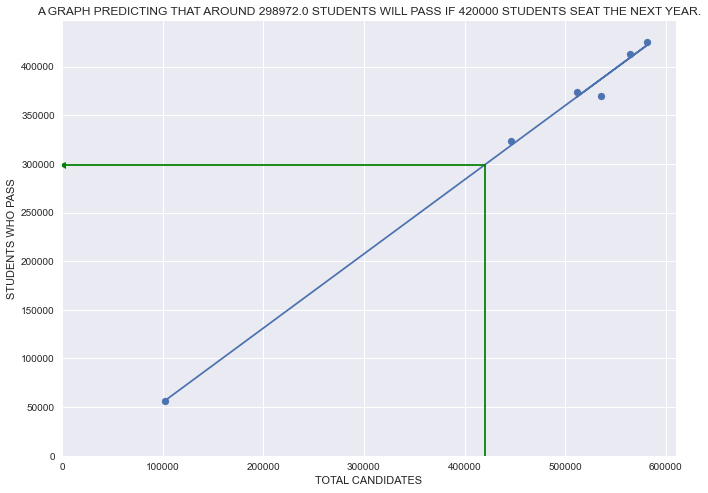

In [37]:
# Predicting students who will pass if a particular number seats
data = ple.assign(passed=ple['div1']+ple['div2']+ple['div3']).groupby(['YEAR']).sum()
slope, intercept, r, p, std_err = stats.linregress(data['TOTAL CANDIDATES'], data['passed'])

def make_y_cordinates(x):
  return slope * x + intercept

y_cordinates = list(map(make_y_cordinates, data['TOTAL CANDIDATES']))
plt.scatter(data['TOTAL CANDIDATES'],data['passed'])
plt.plot(data['TOTAL CANDIDATES'],y_cordinates)

num = 420000
predicted = make_y_cordinates(num)
plt.plot([num,num],[0,predicted], color='g')
plt.plot([0,num],[predicted,predicted], color='g')
plt.plot([0],[predicted], color='g', marker='<')

plt.title('A GRAPH PREDICTING THAT AROUND '+str(predicted.round())+' STUDENTS WILL PASS IF '+str(num)+' STUDENTS SEAT THE NEXT YEAR.')
plt.xlabel('TOTAL CANDIDATES')
plt.ylabel('STUDENTS WHO PASS')
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.show()

#### STATISTICAL REPRESENTATION OF THE DATA

In [38]:
ple[['TOTAL CANDIDATES','div1','div2','div3','div4','divU','divX','FEMALE CANDIDATES','female div1','female div2','female div3','female div4','female divU','female divX','MALE CANDIDATES','male div1','male div2','male div3','male div4','male divU','male divX']].describe()

,TOTAL CANDIDATES,div1,div2,div3,div4,divU,divX,FEMALE CANDIDATES,female div1,female div2,...,female div4,female divU,female divX,MALE CANDIDATES,male div1,male div2,male div3,male div4,male divU,male divX
count,56441.000000,56441.000000,56441.000000,56441.000000,56441.000000,56441.000000,56441.000000,56441.000000,56441.000000,56441.000000,...,56441.000000,56441.000000,56441.000000,56441.000000,56441.000000,56441.000000,56441.000000,56441.000000,56441.000000,56441.000000
mean,48.558778,4.387927,20.321823,10.055421,6.129587,5.916745,1.747276,24.103241,1.753052,9.422104,...,3.285856,3.378661,0.952056,24.455538,2.634858,10.899913,4.743945,2.843660,2.538102,0.795060
std,34.862216,12.702590,20.856485,8.430412,6.239222,8.622503,2.397395,19.411796,6.236890,11.650347,...,3.737692,5.047295,1.489749,17.394028,7.267404,10.453704,4.329696,3.224146,4.072266,1.298847
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,0.000000,7.000000,4.000000,2.000000,0.000000,0.000000,12.000000,0.000000,2.000000,...,1.000000,0.000000,0.000000,13.000000,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000
50%,39.000000,0.000000,15.000000,8.000000,5.000000,3.000000,1.000000,19.000000,0.000000,6.000000,...,2.000000,1.000000,0.000000,20.000000,0.000000,8.000000,4.000000,2.000000,1.000000,0.000000
75%,60.000000,3.000000,27.000000,14.000000,9.000000,8.000000,2.000000,30.000000,1.000000,13.000000,...,5.000000,5.000000,1.000000,31.000000,2.000000,15.000000,7.000000,4.000000,3.000000,1.000000
max,444.000000,305.000000,278.000000,85.000000,106.000000,127.000000,217.000000,247.000000,164.000000,161.000000,...,69.000000,68.000000,135.000000,240.000000,159.000000,140.000000,42.000000,38.000000,69.000000,82.000000
